In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

   Group1  Group2  Group 3
0      95      83       58
1      79      85       70
2      75      51       65
3      77      80       78
4      86      59       70
5      70      72       75


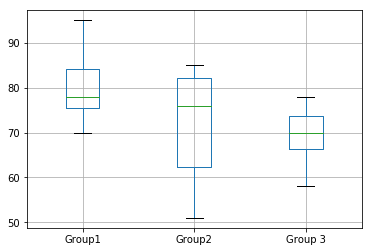

In [5]:
d = pd.read_excel("C:/Users/soura/Documents/Python/final stat.xlsx")
print(d)
# boxplot
d.boxplot()


In [6]:
d

,Group1,Group2,Group 3
0,95,83,58
1,79,85,70
2,75,51,65
3,77,80,78
4,86,59,70
5,70,72,75


In [9]:
import scipy.stats as ss

In [13]:
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = ss.f_oneway(d['Group1'], d['Group2'], d['Group 3'])
print(pvalue,'    ',fvalue)

0.18784637360178355      1.8731928954977284


In [18]:
# to get ANOVA table
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_new = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['Group1', 'Group2', 'Group 3'])
# replace column names
d_new.columns = ['index', 'treatments', 'value']
#print(d_new)
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_new).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq    df         F    PR(>F)
C(treatments)   403.111111   2.0  1.873193  0.187846
Residual       1614.000000  15.0       NaN       NaN


In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_new['value'], groups=d_new['treatments'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1 group2 meandiff  lower    upper  reject
-----------------------------------------------
Group 3 Group1   11.0   -4.5498  26.5498 False 
Group 3 Group2  2.3333  -13.2165 17.8832 False 
 Group1 Group2 -8.6667  -24.2165  6.8832 False 
-----------------------------------------------


In [9]:
import numpy as np

In [10]:
#data
position=np.array(['middle','middle','middle','middle','middle','front','front','front','back','back','back'])
marks=np.array([60,64,67,61,55,80,79,59,30,35,10])

In [11]:
# Group age data by race
student_frame = pd.DataFrame({"position":position,"marks":marks})
groups = student_frame.groupby("position").groups

In [12]:
# Etract individual groups
middle = marks[groups['middle']]
back = marks[groups['back']]
front = marks[groups['front']]

In [13]:
fvalue, pvalue=ss.f_oneway(middle, back, front)
print(pvalue)

0.000598785664853753


In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=marks, groups=position, alpha=0.05)          

tukey.summary()  

group1,group2,meandiff,p-adj,lower,upper,reject
back,front,47.6667,0.001,25.6777,69.6556,True
back,middle,36.4,0.0019,16.7325,56.0675,True
front,middle,-11.2667,0.2864,-30.9342,8.4008,False


In [15]:
data = pd.read_csv('PlantGrowth.csv')

In [16]:
data

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('weight ~ group',data=d_new).fit()
                
aov_table = sm.stats.anova_lm(mod)

print(aov_table)

PatsyError: Error evaluating factor: NameError: name 'weight' is not defined
    weight ~ group
    ^^^^^^

In [18]:
#from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog=data['weight'], groups=data['group'], alpha=0.05)

In [19]:
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3921 -1.0621 0.3201  False
  ctrl   trt2    0.494  0.198 -0.1971 1.1851  False
  trt1   trt2    0.865  0.012  0.1739 1.5561   True
---------------------------------------------------


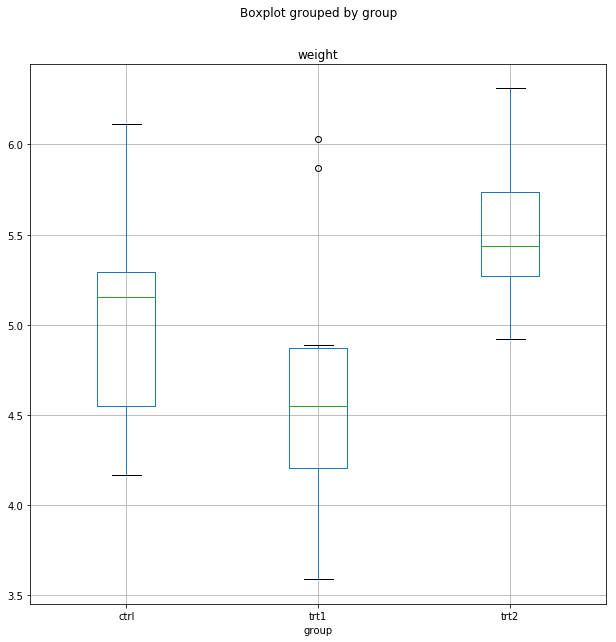

In [20]:
data.boxplot(column='weight' ,by='group',figsize=(10,10))